This notebook is a test of MacCormack algorithm for propagating hyperbolic equations with source terms.

We can take a function $f(t,x) = e^{-x^2}t$.
From this solution, we have the differential equation:
$\partial_t f + \partial_x f = e^{-x^2}(1-2xt)$.
We can take as an initial condition $f(t=1, x) = e^{-x^2}$

Let's set up the problem on a finite lattice of points in x...

In [17]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 7]
plt.rcParams['lines.linewidth'] = 3
matplotlib.rcParams.update({'font.size': 22})
import math
nx = 101 #number of points on grid
dx = 0.15 # the grid spacing
max_x = (nx - 1) / 2.0 * dx # size of grid 
xvals = np.arange(-max_x, max_x + dx, dx)
f = np.zeros(nx) #the current value of the function f
f_p = np.zeros(nx) #the previous value of the function f, before being updated 

Let's initialize our function according to the initial conditions at $t=1$

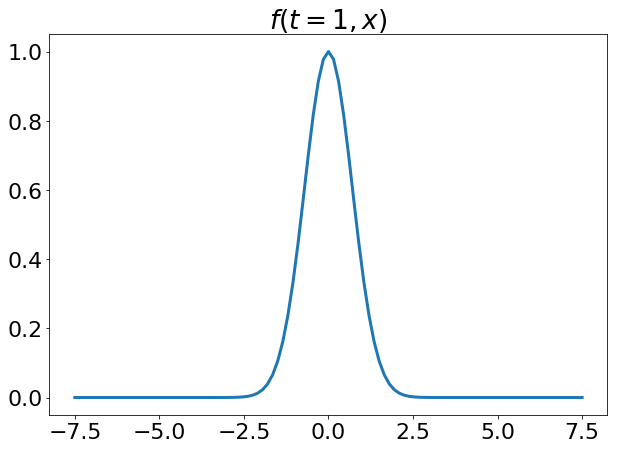

In [18]:
for i in range(0, nx):
    x = xvals[i]
    f_p[i] = math.exp(-x**2.0)
    
plt.plot(xvals, f_p)
plt.title(r"$f(t=1, x)$")
plt.show()

Now let's loop over time steps, and at each time step update the function

In [19]:
nt = 100 #number of time steps
dt = 0.025 #time step spacing 
t0 = 1.0 #initial time

for it in range(0, nt):
    t = t0 + it * dt
    
    #update with the first (guess step)
    for ix in range(2, nx-2):
        f_c = f_p[ix] # value
        f_r = f_p[ix+1] # value on the right
        f_l = f_p[ix-1] # value on the left 
        #predictor step with forward difference
        f_pred = f_c - dt * (f_r - f_c) / dx #predicted value at center
        f_pred_l = f_l - dt * (f_c - f_l) / dx # predicted value left
        #average
        f_avg = (f_c + f_pred) / 2.0
        #corrector step
        f_corr = f_avg - dt * (f_pred - f_pred_l) / 2.0 / dx
        
        #update the value of f(x)
        f[ix] = f_corr
        
    #now swap the current and previous values 
    for ix in range(2, nx-2):
        f_p[ix] = f[ix]
        
    #now propagate the source term? (RK2)
    for ix in range(2, nx-2):
        x = xvals[ix]
        s = math.exp(-x**2.0) * (1.0 - 2.0 * x * t)
        #use RK2
        k1 = s
        #guess step
        y1 = f_p[ix] + k1 * (dt / 2.0)
        k2 = (y1 - f_p[ix]) / (dt / 2.0)
        #corrector step
        y2 = f_p[ix] + k2 * dt
        #update the value of f(x)
        f[ix] = y2
        
    #now swap the current and previous values 
    for ix in range(2, nx-2):
        f_p[ix] = f[ix]

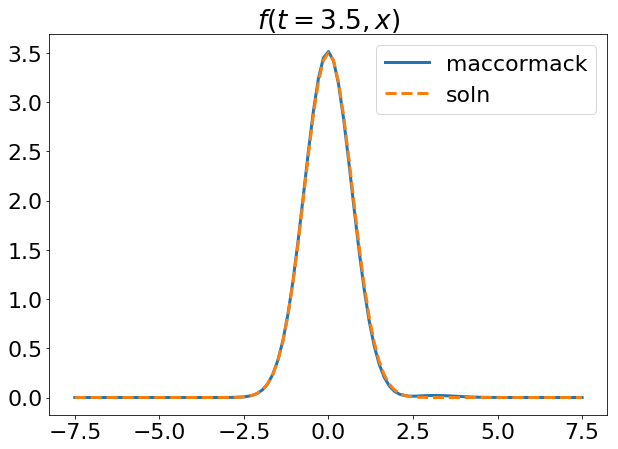

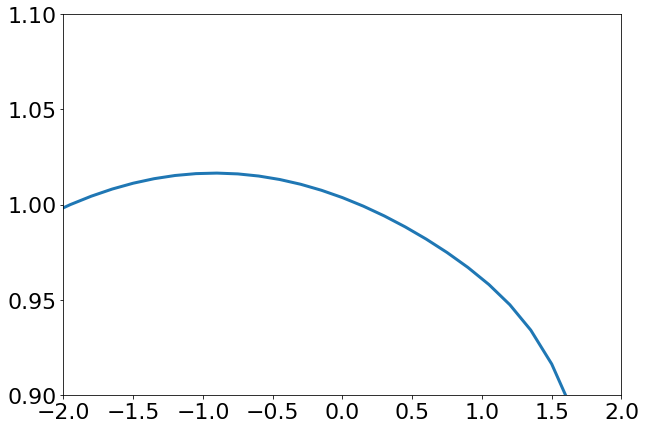

In [20]:
soln = []
t = 3.5
for x in xvals:
    soln.append( math.exp(-x**2) * t)
plt.plot(xvals, f, label="maccormack")
plt.plot(xvals, soln, '--',label="soln")
plt.title(r"$f(t=3.5, x)$")
plt.legend()
plt.show()

plt.xlim(-2,2)
plt.ylim(0.9,1.1)
plt.plot(xvals, f / soln, label='ratio')

Is there a way to propagate the source term inside the maccormack steps?